In [1]:
# datasets from my GitHub
!git clone https://github.com/William-HTP/Google-Play-App-Reviews-Datasets.git

Cloning into 'Google-Play-App-Reviews-Datasets'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), 3.18 MiB | 6.79 MiB/s, done.


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.8 MB/s eta 0:00:00


In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
from torch import nn
from torch.optim import Adam
from transformers import GPT2Model, GPT2Tokenizer
from tqdm import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [25]:
# tell pytorch to use the gpu if available
if torch.cuda.is_available():    
      
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla V100-SXM2-16GB


In [119]:
df = pd.read_excel('/content/Google-Play-App-Reviews-Datasets/dataset_balanced_4000.xlsx')
pd.set_option('display.max_colwidth', None)
df

,ID,review,label,new_label,remove_all_stopwords,remove_some_stopwords,stemming,lemmatization
0,1,Not able to add freinds. It show something went wrong.. Recommend not to install it,bug report,0,able add freinds show something went wrong recommend install,not able add freinds show something went wrong recommend not install,not abl to add freind it show someth went wrong recommend not to instal it,not able to add freinds it show something went wrong recommend not to install it
1,2,Calls keep dropping for no reason and is super annoying,bug report,0,calls keep dropping reason super annoying,calls keep dropping no reason super annoying,call keep drop for no reason and is super annoy,call keep dropping for no reason and is super annoying
2,3,Can't access to my account solve this issue immediately,bug report,0,cant access account solve issue immediately,cant access account solve issue immediately,cant access to my account solv thi issu immedi,cant access to my account solve this issue immediately
3,4,"I don't know what's wrong with my own WhatsApp. Its not working. And if I want to sign up, it will just be bringing try again later. You guys should see to it.",bug report,0,dont know whats wrong whatsapp working want sign bringing try later guys see,dont know whats wrong whatsapp not working want sign up will bringing try again later guys should see,i dont know what wrong with my own whatsapp it not work and if i want to sign up it will just be bring tri again later you guy should see to it,i dont know whats wrong with my own whatsapp it not working and if i want to sign up it will just be bringing try again later you guy should see to it
4,5,Cannot record audio while taking video,bug report,0,cannot record audio taking video,cannot record audio taking video,cannot record audio while take video,cannot record audio while taking video
...,...,...,...,...,...,...,...,...
3995,3996,but can you just make the animation easier please !,feature request,1,make animation easier please,but can make animation easier please,but can you just make the anim easier pleas,but can you just make the animation easier please
3996,3997,While many third party app can view the file without internet. This app fails to deliver that.,feature request,1,many third party app view file without internet app fails deliver,many third party app can view file without internet app fails deliver,while mani third parti app can view the file without internet thi app fail to deliv that,while many third party app can view the file without internet this app fails to deliver that
3997,3998,No custom animation... Not good,feature request,1,custom animation good,no custom animation not good,no custom anim not good,no custom animation not good
3998,3999,Need more designs in slides,feature request,1,need designs slides,need more designs slides,need more design in slide,need more design in slide


In [120]:
df = pd.DataFrame(df, columns = ["review", "label"])
df

,review,label
0,Not able to add freinds. It show something went wrong.. Recommend not to install it,bug report
1,Calls keep dropping for no reason and is super annoying,bug report
2,Can't access to my account solve this issue immediately,bug report
3,"I don't know what's wrong with my own WhatsApp. Its not working. And if I want to sign up, it will just be bringing try again later. You guys should see to it.",bug report
4,Cannot record audio while taking video,bug report
...,...,...
3995,but can you just make the animation easier please !,feature request
3996,While many third party app can view the file without internet. This app fails to deliver that.,feature request
3997,No custom animation... Not good,feature request
3998,Need more designs in slides,feature request


In [121]:
df.columns = ['review','label']
df

,review,label
0,Not able to add freinds. It show something went wrong.. Recommend not to install it,bug report
1,Calls keep dropping for no reason and is super annoying,bug report
2,Can't access to my account solve this issue immediately,bug report
3,"I don't know what's wrong with my own WhatsApp. Its not working. And if I want to sign up, it will just be bringing try again later. You guys should see to it.",bug report
4,Cannot record audio while taking video,bug report
...,...,...
3995,but can you just make the animation easier please !,feature request
3996,While many third party app can view the file without internet. This app fails to deliver that.,feature request
3997,No custom animation... Not good,feature request
3998,Need more designs in slides,feature request


In [122]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token

In [123]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token
labels = {
    "bug report": 0,
    "feature request": 1,
    "user experience": 2,
    "rating": 3
         }

class Dataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.labels = [labels[label] for label in df['label']]
        self.texts = [tokenizer(text,
                                padding='max_length',
                                max_length=128,
                                truncation=True,
                                return_tensors="pt") for text in df['review']]
        
    def classes(self):
        return self.labels
    
    def __len__(self):
        return len(self.labels)
    
    def get_batch_labels(self, idx):
        # Get a batch of labels
        return np.array(self.labels[idx])
    
    def get_batch_texts(self, idx):
        # Get a batch of inputs
        return self.texts[idx]
    
    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)
        return batch_texts, batch_y

In [124]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=35),
                                     [int(0.8*len(df)), int(0.9*len(df))])

print(len(df_train), len(df_val), len(df_test))

3200 400 400


In [125]:
class SimpleGPT2SequenceClassifier(nn.Module):
    def __init__(self, hidden_size: int, num_classes:int ,max_seq_len:int, gpt_model_name:str):
        super(SimpleGPT2SequenceClassifier,self).__init__()
        self.gpt2model = GPT2Model.from_pretrained(gpt_model_name)
        self.fc1 = nn.Linear(hidden_size*max_seq_len, num_classes)

    def forward(self, input_id, mask):
        """
        Args:
                input_id: encoded inputs ids of sent.
        """
        gpt_out, _ = self.gpt2model(input_ids=input_id, attention_mask=mask, return_dict=False)
        batch_size = gpt_out.shape[0]
        linear_output = self.fc1(gpt_out.view(batch_size,-1))
        return linear_output

In [126]:
def train(model, train_data, val_data, learning_rate, epochs):

    loss_values = []
    acc_values = []
    eval_loss_values = []
    eval_acc_values = []

    train, val = Dataset(train_data), Dataset(val_data)
    
    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)
    
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)
    
    if use_cuda:
        model = model.cuda()
        criterion = criterion.cuda()

    for epoch_num in range(epochs):
        total_acc_train = 0
        total_loss_train = 0
        
        for train_input, train_label in tqdm(train_dataloader):
            train_label = train_label.to(device)
            mask = train_input['attention_mask'].to(device)
            input_id = train_input["input_ids"].squeeze(1).to(device)
            
            model.zero_grad()

            output = model(input_id, mask)
            
            batch_loss = criterion(output, train_label)
            total_loss_train += batch_loss.item()
            
            acc = (output.argmax(dim=1)==train_label).sum().item()
            total_acc_train += acc

            batch_loss.backward()
            optimizer.step()
            
        total_acc_val = 0
        total_loss_val = 0
        
        with torch.no_grad():
            
            for val_input, val_label in val_dataloader:
                val_label = val_label.to(device)
                mask = val_input['attention_mask'].to(device)
                input_id = val_input['input_ids'].squeeze(1).to(device)
                
                output = model(input_id, mask)
                
                batch_loss = criterion(output, val_label)
                total_loss_val += batch_loss.item()
                
                acc = (output.argmax(dim=1)==val_label).sum().item()
                total_acc_val += acc

            loss_values.append(total_loss_train/len(train_data))
            acc_values.append(total_acc_train / len(train_data))
            eval_loss_values.append(total_loss_val / len(val_data))
            eval_acc_values.append(total_acc_val / len(val_data))
                
            print(
            f"Epochs: {epoch_num + 1} | Train Loss: {total_loss_train/len(train_data): .3f} \
            | Train Accuracy: {total_acc_train / len(train_data): .3f} \
            | Val Loss: {total_loss_val / len(val_data): .3f} \
            | Val Accuracy: {total_acc_val / len(val_data): .3f}")

    return loss_values, acc_values, eval_loss_values, eval_acc_values
            
EPOCHS = 5
model = SimpleGPT2SequenceClassifier(hidden_size=768, num_classes=4, max_seq_len=128, gpt_model_name="gpt2")
LR = 1e-6

loss_values, acc_values, eval_loss_values, eval_acc_values = train(model, df_train, df_val, LR, EPOCHS)

100%|██████████| 1600/1600 [01:15<00:00, 21.21it/s]


Epochs: 1 | Train Loss:  0.666             | Train Accuracy:  0.408             | Val Loss:  0.592             | Val Accuracy:  0.495


100%|██████████| 1600/1600 [01:16<00:00, 21.01it/s]


Epochs: 2 | Train Loss:  0.509             | Train Accuracy:  0.581             | Val Loss:  0.491             | Val Accuracy:  0.573


100%|██████████| 1600/1600 [01:15<00:00, 21.31it/s]


Epochs: 3 | Train Loss:  0.410             | Train Accuracy:  0.672             | Val Loss:  0.449             | Val Accuracy:  0.610


100%|██████████| 1600/1600 [01:15<00:00, 21.25it/s]


Epochs: 4 | Train Loss:  0.336             | Train Accuracy:  0.752             | Val Loss:  0.448             | Val Accuracy:  0.640


100%|██████████| 1600/1600 [01:15<00:00, 21.15it/s]


Epochs: 5 | Train Loss:  0.282             | Train Accuracy:  0.792             | Val Loss:  0.427             | Val Accuracy:  0.657


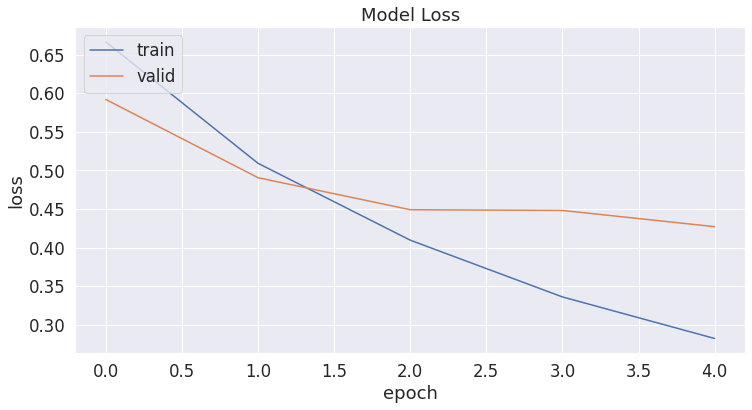

In [128]:
import seaborn as sns

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(loss_values)
plt.plot(eval_loss_values)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

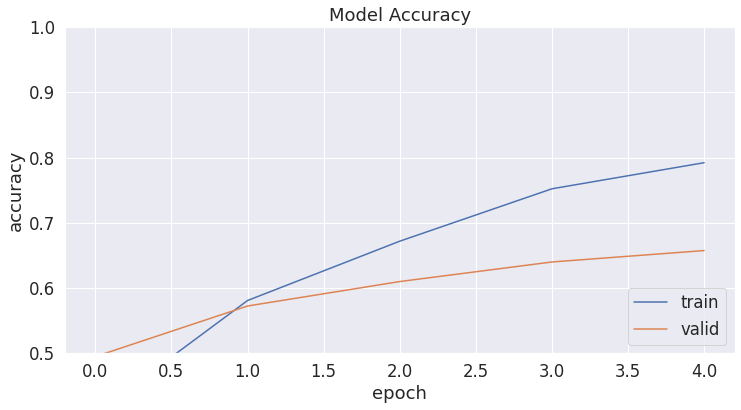

In [129]:
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(acc_values)
plt.plot(eval_acc_values)
plt.title('Model Accuracy')
plt.ylim(0.5, 1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()

In [116]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

        
    # Tracking variables
    predictions_labels = []
    true_labels = []
    
    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

            test_label = test_label.to(device)
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)

            acc = (output.argmax(dim=1) == test_label).sum().item()
            total_acc_test += acc
            
            # add original labels
            true_labels += test_label.cpu().numpy().flatten().tolist()
            # get predicitons to list
            predictions_labels += output.argmax(dim=1).cpu().numpy().flatten().tolist()
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    return true_labels, predictions_labels
    
true_labels, pred_labels = evaluate(model, df_test)

Test Accuracy:  0.679


In [117]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.58      0.84      0.69       181
           1       0.80      0.69      0.74       227
           2       0.68      0.54      0.60       199
           3       0.69      0.66      0.68       193

    accuracy                           0.68       800
   macro avg       0.69      0.68      0.68       800
weighted avg       0.69      0.68      0.68       800



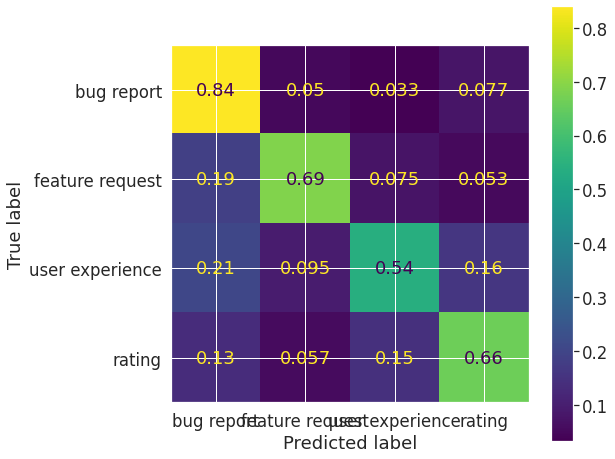

In [118]:
# Plot confusion matrix.
fig, ax = plt.subplots(figsize=(8, 8))
cm = confusion_matrix(y_true=true_labels, y_pred=pred_labels, labels=range(len(labels)), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(labels.keys()))
disp.plot(ax=ax)